# Could Jack Have Been Saved?
## A Data Detective Story from the Titanic

<div style="text-align:center;"> <img src="https://user-gen-media-assets.s3.amazonaws.com/gemini_images/ae9c1529-e636-4491-bd0b-1af4702358fc.png" alt="Minimal lifeboat concept on white" style="width:800px; height:auto;"> </div>

---

## 1. The Setup: Understanding the Disaster

### The Night That Changed Everything

On the cold night of April 14, 1912, at 11:40 PM, the RMS Titanic struck an iceberg during her maiden voyage from Southampton to New York. Less than three hours later, at 2:20 AM on April 15, the *"unsinkable"* ship disappeared beneath the Atlantic Ocean.

**The tragic toll**: Of approximately 2,224 passengers and crew aboard, around 1,500 people died; nearly **68% perished** in the freezing waters. This makes it one of the deadliest peacetime maritime disasters in history.

But here's the question that will drive our investigation

> **Was survival just luck?**

Remember Jack Dawson from the movie? A young, penniless artist traveling in third class. He didn't survive. But could the data have predicted his fate? Let's investigate.

---

### Loading the Evidence



In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

COLORS = {
    'died': '#ff6b6b',        # Light red for deaths
    'survived': '#95e1d3',    # Light green/teal for survivals
    'neutral_1': '#7a8ca0',   # Blue-gray for categorical data
    'neutral_2': '#a0b4c8',   # Lighter blue-gray
    'neutral_3': '#c8d6e5',   # Very light blue-gray
    'male': '#7a8ca0',        # Neutral blue-gray for males
    'female': '#a0b4c8',      # Lighter neutral for females
    'class_1': '#5f6f81',     # Dark neutral for 1st class
    'class_2': '#8896a8',     # Medium neutral for 2nd class  
    'class_3': '#b0bac9'      # Light neutral for 3rd class
}

In [112]:
titanic = sns.load_dataset('titanic')

print("\tFirst look at our passengers:")
titanic.head()

	First look at our passengers:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [114]:
print("\n\tThe last passengers in our records:\n")
titanic.tail()


	The last passengers in our records:



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True



**What we're looking at**: Each row represents one passenger. Each column tells us something about them; their age, class, whether they survived.

---

### Understanding Our Dataset

- How much data do we have to work with?
- What information do we have about each passenger?


In [116]:
print(f" Total passengers in our dataset: {titanic.shape}")

 Total passengers in our dataset: (891, 15)


In [118]:
print("DETAILED DATASET INFORMATION")
titanic.info()

DETAILED DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### Decoding the Columns

Let's understand what each piece of information means :

| Column | Meaning | Examples |
|--------|---------|----------|
| **PassengerId** | Unique identifier for each passenger | 1, 2, 3... |
| **Survived** | Did they survive? | 0 = No, 1 = Yes |
| **Pclass** | Ticket class (socioeconomic status) | 1 = First, 2 = Second, 3 = Third |
| **Name** | Passenger's name | "Braund, Mr. Owen Harris" |
| **Sex** | Gender | male, female |
| **Age** | Age in years | 22, 38, 26... |
| **SibSp** | Number of siblings/spouses aboard | 0, 1, 2... |
| **Parch** | Number of parents/children aboard | 0, 1, 2... |
| **Ticket** | Ticket number | "A/5 21171" |
| **Fare** | Ticket price (in British pounds) | 7.25, 71.28... |
| **Cabin** | Cabin number | "C85", "B96 B98" |
| **Embarked** | Port of embarkation | S = Southampton, C = Cherbourg, Q = Queenstown |

---

### Statistical Overview

In [120]:
print("STATISTICAL SUMMARY")
titanic.describe()

STATISTICAL SUMMARY


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Notice anything interesting?**

- The `Age` column shows 714 values, but we have 891 passengers; **some ages are missing!**
- Average fare was `£32`, but the maximum was `£512`; **huge wealth inequality**
- Only `38%` survived on average (mean of `survived` column)

### The Central Question: How Many Actually Survived?


In [122]:
total_passengers = len(titanic)
total_survived = titanic['survived'].sum()
total_died = total_passengers - total_survived
survival_rate = titanic['survived'].mean()

print("THE GRIM REALITY")
print(f"Survived:  {total_survived} passengers ({survival_rate:.1%})")
print(f"Perished:  {total_died} passengers ({1-survival_rate:.1%})")

THE GRIM REALITY
Survived:  342 passengers (38.4%)
Perished:  549 passengers (61.6%)


### Calculate survival statistics

Visualizing the tragedy



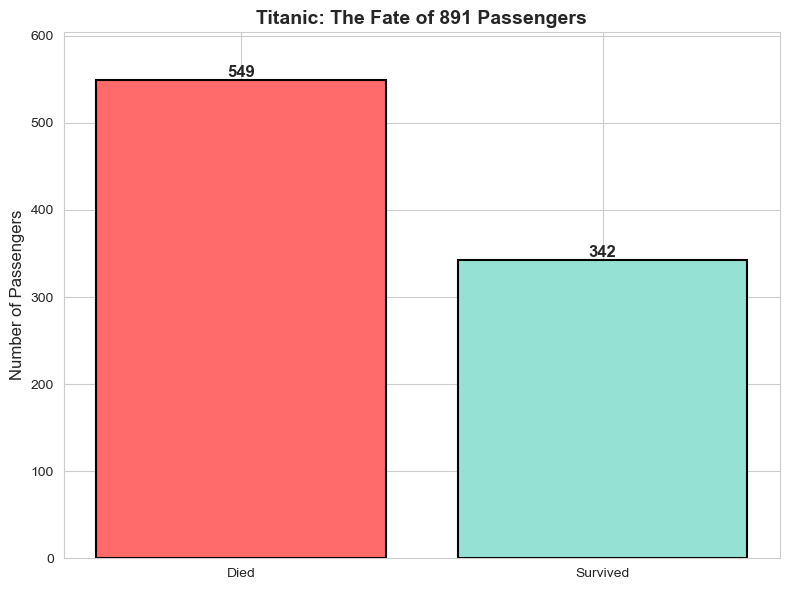

In [124]:
fig, ax = plt.subplots(figsize=(8, 6))

survival_counts = titanic['survived'].value_counts()
bars = ax.bar(['Died', 'Survived'], 
               [survival_counts[0], survival_counts[1]], 
               color=[COLORS['died'], COLORS['survived']],
               edgecolor='black',
               linewidth=1.5)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_ylabel('Number of Passengers', fontsize=12)
ax.set_title('Titanic: The Fate of 891 Passengers', fontsize=14, fontweight='bold')
ax.set_ylim(0, max(survival_counts) * 1.1)

plt.tight_layout()
plt.show()

### The Big Question

**Was survival just random luck?**

Right now, we know 38% survived overall. But here's what makes this interesting: 

> Did everyone have the same odds?

Or did things like your ticket class, whether you were a man or woman, and how old you were completely change your chances?

Think about it: Some groups might have had 70% survival rates. Others might have had only 20%. That's a huge difference.

**What we suspect**: Survival wasn't random at all. Certain factors probably made all the difference between life and death.

**Our detective work**: We're going to hunt for patterns hiding in this data. And at the end, we'll answer the question that started this whole investigation:

> **Could Jack, a young, broke, third-class guy traveling alone, have made it off that ship alive?**

The answer is in the numbers. Let's start digging.

---

## 2. Getting to Know the Passengers

Before exploring patterns, clarify what each column represents and how it might relate to survival. Some features are predictive; others are just identifiers.

### What Does Each Variable Mean?

- `PassengerId`:  Unique row identifier; useful for reference, not for prediction.
- `Survived` (target): 0 = died, 1 = survived; this is the outcome to predict.
- `Pclass` (Passenger class): 1 = First, 2 = Second, 3 = Third; proxy for socioeconomic status and likely cabin location.
- `Sex`: male or female; relevant due to "women and children first" evacuation norms.
- `Age`: Age in years; children may have priority, older adults may face mobility challenges.
- `SibSp` (Siblings/Spouses aboard): Count of siblings and/or spouses traveling with the passenger; 0 means none.
- `Parch` (Parents/Children aboard):  Count of parents and/or children traveling with the passenger; 0 means none.
- `Fare`: Ticket price in British pounds; correlates with class and cabin assignment.
- `Embarked` (Port of embarkation): S = Southampton, C = Cherbourg, Q = Queenstown (Cobh); correlates with class mix.
- `Cabin`: Cabin code (e.g., C85); often missing, but when present can hint at deck proximity to lifeboats.

### Why This Matters

- Identity and priority: sex, age
- Access and proximity: pclass, fare, cabin
- Social context: sibsp, parch, family_size, is_alone

Jack's profile (reference):
- Pclass: 3
- Sex: male
- Age: ~20
- SibSp: 0
- Parch: 0
- Fare: low


In [126]:
# Let's explore each variable in detail

print("EXPLORING OUR VARIABLES")

# 1. Look at a few passengers to see real examples
print("\nSample passengers with all their information:\n")
print(titanic[['survived', 'pclass', 'sex', 'age', 
          'sibsp', 'parch', 'fare', 'embarked']].head(10))

EXPLORING OUR VARIABLES

Sample passengers with all their information:

   survived  pclass     sex   age  sibsp  parch     fare embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S
5         0       3    male   NaN      0      0   8.4583        Q
6         0       1    male  54.0      0      0  51.8625        S
7         0       3    male   2.0      3      1  21.0750        S
8         1       3  female  27.0      0      2  11.1333        S
9         1       2  female  14.0      1      0  30.0708        C


In [128]:
# 2. Passenger Class - what classes do we have?
print("\nPASSENGER CLASS (pclass)")
print(titanic['pclass'].value_counts().sort_index())
print(f"\nMost common class: {titanic['pclass'].mode()[0]} (Third Class)")



PASSENGER CLASS (pclass)
pclass
1    216
2    184
3    491
Name: count, dtype: int64

Most common class: 3 (Third Class)


In [130]:
# 3. Sex - gender split
print("\nSEX")
print(titanic['sex'].value_counts())
print(f"\nGender split: {titanic['sex'].value_counts(normalize=True).values[0]:.1%} male")


SEX
sex
male      577
female    314
Name: count, dtype: int64

Gender split: 64.8% male


In [132]:
# 4. Age - what's the age range?
print("\nAGE")
print(f"Youngest passenger: {titanic['age'].min()} years old")
print(f"Oldest passenger: {titanic['age'].max()} years old")
print(f"Average age: {titanic['age'].mean():.1f} years old")
print(f"Missing ages: {titanic['age'].isnull().sum()} passengers")


AGE
Youngest passenger: 0.42 years old
Oldest passenger: 80.0 years old
Average age: 29.7 years old
Missing ages: 177 passengers


In [134]:
# 5. SibSp - family connections (siblings/spouses)
print("\nSIBLINGS/SPOUSES (sibsp)")
print(titanic['sibsp'].value_counts().sort_index())
print(f"\nTraveling without siblings/spouse: {(titanic['sibsp'] == 0).sum()} passengers")



SIBLINGS/SPOUSES (sibsp)
sibsp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: count, dtype: int64

Traveling without siblings/spouse: 608 passengers


In [136]:
# 6. Parch - parents/children
print("\nPARENTS/CHILDREN (parch)")
print(titanic['parch'].value_counts().sort_index())
print(f"\nTraveling without parents/children: {(titanic['parch'] == 0).sum()} passengers")



PARENTS/CHILDREN (parch)
parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: count, dtype: int64

Traveling without parents/children: 678 passengers


In [138]:
# 7. Fare - ticket prices
print("\nFARE")
print(f"Cheapest ticket: £{titanic['fare'].min():.2f}")
print(f"Most expensive ticket: £{titanic['fare'].max():.2f}")
print(f"Average fare: £{titanic['fare'].mean():.2f}")


FARE
Cheapest ticket: £0.00
Most expensive ticket: £512.33
Average fare: £32.20


In [140]:
# 8. Embarked - boarding location
print("\nEMBARKED (Port of Boarding)")
print(titanic['embarked'].value_counts())
print("\nS = Southampton, C = Cherbourg, Q = Queenstown")



EMBARKED (Port of Boarding)
embarked
S    644
C    168
Q     77
Name: count, dtype: int64

S = Southampton, C = Cherbourg, Q = Queenstown


In [144]:
# 9. Deck - cabin deck information
print("\nDECK")
print(f"Passengers with deck info: {titanic['deck'].notna().sum()}")
print(f"Passengers without deck info: {titanic['deck'].isna().sum()}")
print(f"Missing deck data: {titanic['deck'].isna().sum() / len(titanic) * 100:.1f}%")


DECK
Passengers with deck info: 203
Passengers without deck info: 688
Missing deck data: 77.2%


OVERALL SURVIVAL RATE

Died: 549 passengers (61.6%)
Survived: 342 passengers (38.4%)


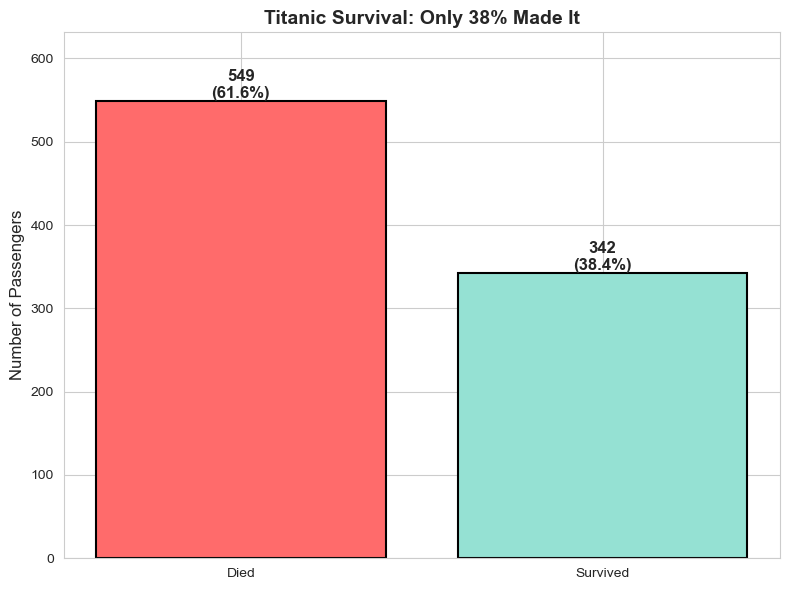

KEY TAKEAWAY: Most people did NOT survive.
Now let's see if certain groups had better odds...


In [146]:
# OVERALL SURVIVAL RATE
print("OVERALL SURVIVAL RATE")

survival_props = titanic['survived'].value_counts(normalize=True)
survival_counts = titanic['survived'].value_counts()

print(f"\nDied: {survival_counts[0]} passengers ({survival_props[0]:.1%})")
print(f"Survived: {survival_counts[1]} passengers ({survival_props[1]:.1%})")

# Visualize it
fig, ax = plt.subplots(figsize=(8, 6))

bars = ax.bar(['Died', 'Survived'], 
               [survival_counts[0], survival_counts[1]],
               color=[COLORS['died'], COLORS['survived']],
               edgecolor='black',
               linewidth=1.5)

# Add value labels and percentages on bars
for i, (bar, count) in enumerate(zip(bars, survival_counts)):
    height = bar.get_height()
    percentage = count / len(titanic) * 100
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}\n({percentage:.1f}%)',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_ylabel('Number of Passengers', fontsize=12)
ax.set_title('Titanic Survival: Only 38% Made It', fontsize=14, fontweight='bold')
ax.set_ylim(0, max(survival_counts) * 1.15)

plt.tight_layout()
plt.show()

print("KEY TAKEAWAY: Most people did NOT survive.")
print("Now let's see if certain groups had better odds...")

## 3. The Missing Pieces

### The Problem with Incomplete Records

Here's the thing about data from 1912: not everything was recorded perfectly. Some passengers didn't have their age written down. Some cabin numbers were never logged. A couple of people didn't even have their boarding location noted. 

**Why does this matter?** Because if we want to find patterns, we need to decide what to do with these gaps. We can't just ignore them; that could hide important clues about survival.

---

### Finding the Gaps

First, let's see what we're dealing with. Where are the holes in our data?

**Questions to answer:**

- Which columns have missing information?
- How much is missing from each?
- Can we spot any patterns in what's missing?

Some columns might be almost complete (just a few missing values), while others might be mostly empty. This will tell us how to handle each one.

### Our Strategy for Each Type of Missing Data

Not all missing data is the same. Here's how we'll handle different situations:

**Age (~20% missing)**

About 1 in 5 passengers don't have an age recorded. We CAN'T just delete these people; we'd lose too much information! Instead, we'll make smart guesses based on their passenger class.

**Why class matters**: First-class passengers were generally older and wealthier. Third-class passengers included many young immigrants. So we'll fill in missing ages with the median (middle) age for each class. 


**Deck (Mostly missing)**

This one's tricky; most passengers don't have deck information recorded. We can't make good guesses here because too much is missing.

**Solution**: Instead of guessing, we'll create a new yes/no column: Did they have a deck recorded or not? This might tell us something useful; maybe having a recorded deck means you were in a better location on the ship.


**Embarked (Only 2 missing)**

Only 2 passengers are missing their boarding location. That's tiny! For these, we'll just use the most common port: Southampton (where most people boarded).


**Fare (Rare)**

Fare is usually complete, but if we find missing values, we'll fill them in with the median fare for that passenger's class. Makes sense; third-class tickets cost way less than first-class, so we need to match the class.


**Duplicates**

We'll also check if any passengers appear twice in the data. This would mess up our counts and need to be fixed.


### Why This Matters for Jack

Remember, Jack was third class, young, male. If his age had been missing in the records, we'd fill it in with the median age of third-class passengers (probably in their 20s). This approach keeps our analysis honest; we're making educated guesses based on real patterns, not just random numbers. 

Now let's see exactly what's missing and fix it.




### Identifying and Visualizing Missing Values

In [150]:
# Part 1: Finding the Missing Pieces

print("HUNTING FOR MISSING DATA")

# Count missing values in each column
missing_data = titanic.isnull().sum()

print("\nMissing values per column:")
print(missing_data)

print("\nMissing values as percentages:")
print("-" * 40)
missing_percent = (titanic.isnull().sum() / len(titanic)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Percentage': missing_percent
}).sort_values('Percentage', ascending=False)

print(missing_df[missing_df['Missing Count'] > 0])

print("\nKEY OBSERVATIONS:")
print(f"Deck: {missing_percent['deck']:.1f}% missing - MOSTLY EMPTY!")
print(f"Age: {missing_percent['age']:.1f}% missing - Need to fill these")
print(f"Embarked: {missing_data['embarked']} missing - Just a couple")
print(f"Fare: {missing_data['fare']} missing - Almost none")


HUNTING FOR MISSING DATA

Missing values per column:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Missing values as percentages:
----------------------------------------
             Missing Count  Percentage
deck                   688   77.216611
age                    177   19.865320
embarked                 2    0.224467
embark_town              2    0.224467

KEY OBSERVATIONS:
Deck: 77.2% missing - MOSTLY EMPTY!
Age: 19.9% missing - Need to fill these
Embarked: 2 missing - Just a couple
Fare: 0 missing - Almost none


### Visualize missing data with a heatmap

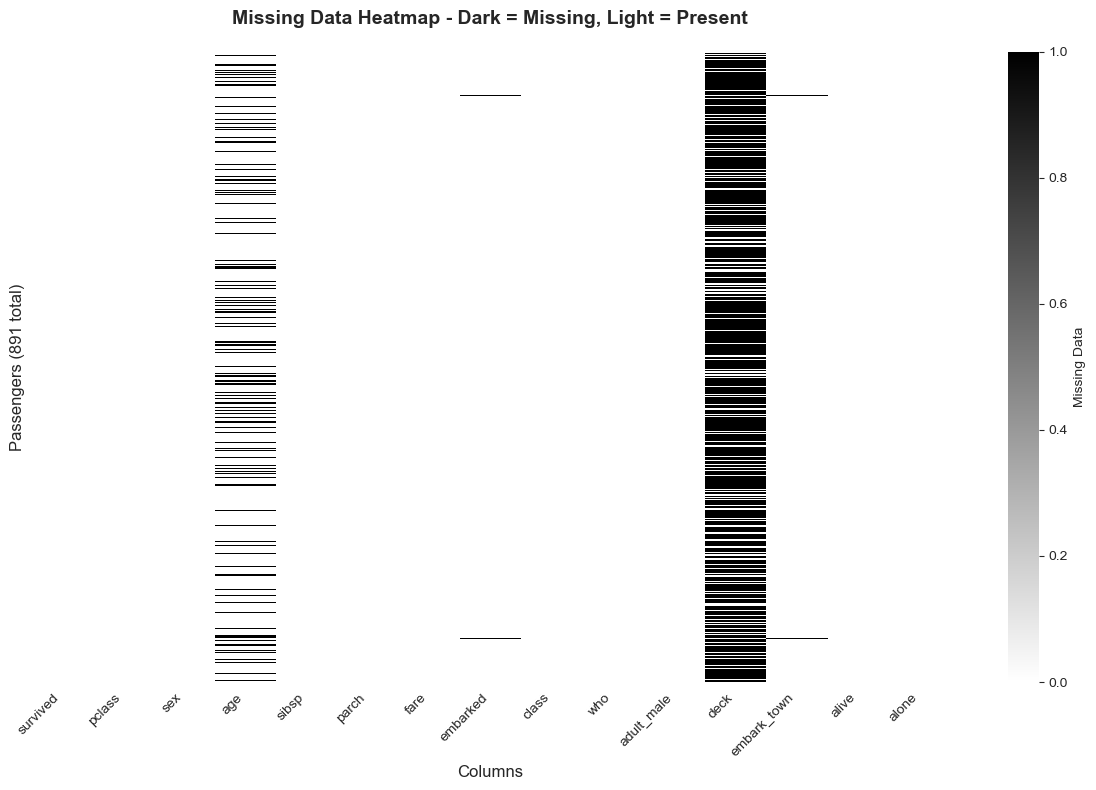

In [152]:
plt.figure(figsize=(12, 8))

# Create a dataframe showing where data is missing (True = missing, False = present)
missing_matrix = titanic.isnull()

# Plot heatmap with neutral color scheme
# Use a simple gray scale where light = present, dark = missing
sns.heatmap(missing_matrix, 
            yticklabels=False,
            cbar=True,
            cmap='gray_r',  # Reversed gray: white = present, dark = missing
            cbar_kws={'label': 'Missing Data'},
            vmin=0, 
            vmax=1)

plt.title('Missing Data Heatmap - Dark = Missing, Light = Present', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Passengers (891 total)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Now What? Making Smart Decisions

We've found the gaps in our passenger records. Now comes the important part: what do we do about them?

We have three main options when dealing with missing data:

**Option 1: Fill in the blanks intelligently**
- If we can make educated guesses based on other information, we should
- Example: A third-class passenger's missing age? Use the typical age for third-class passengers

**Option 2: Create new information from what's missing**
- Sometimes the fact that data is missing tells us something
- Example: No deck number recorded? That itself might be a clue about their location

**Option 3: Remove incomplete records**
- Only when we have too little information to work with
- We avoid this when possible—we don't want to lose valuable clues!

The key question: **Will our decision help us answer whether Jack could have survived, or will it hide important patterns?**

Let's handle each column strategically, choosing the approach that makes the most sense for that specific type of missing data.

---


In [154]:
# Part 2 – Fixing the Missing Data 

print("\nFIXING THE MISSING PIECES")

# Keep a copy for comparison
titanic_original = titanic.copy()

# ------------------------------------------------------------
# 1. AGE – fill with median by passenger class
# ------------------------------------------------------------
print("\nAGE")
print(f"Missing ages before: {titanic['age'].isnull().sum()}")

age_by_class = titanic.groupby('pclass')['age'].median()
print("\nMedian age by passenger class:")
print(age_by_class)

titanic['age'] = titanic.groupby('pclass')['age'].transform(
    lambda x: x.fillna(x.median())
)

print(f"\nMissing ages after: {titanic['age'].isnull().sum()}")
print("Filled missing ages with the class-specific median.")

# ------------------------------------------------------------
# 2. DECK – create binary feature has_deck
# ------------------------------------------------------------
print("\nDECK")
print(f"Missing deck info: {titanic['deck'].isnull().sum()} of {len(titanic)} rows")

titanic['has_deck'] = titanic['deck'].notna().astype(int)
print("\nValue counts for has_deck:")
print(titanic['has_deck'].value_counts())
print("High missing rate; kept information as a binary flag.")

# ------------------------------------------------------------
# 3. EMBARKED – fill with mode
# ------------------------------------------------------------
print("\nEMBARKED")
print(f"Missing embarked before: {titanic['embarked'].isnull().sum()}")

if titanic['embarked'].isnull().sum() > 0:
    most_common_port = titanic['embarked'].mode()[0]
    titanic['embarked'].fillna(most_common_port, inplace=True)

print(f"Missing embarked after: {titanic['embarked'].isnull().sum()}")

# ------------------------------------------------------------
# 4. FARE – fill with median by passenger class
# ------------------------------------------------------------
print("\nFARE")
print(f"Missing fare before: {titanic['fare'].isnull().sum()}")

if titanic['fare'].isnull().sum() > 0:
    titanic['fare'] = titanic.groupby('pclass')['fare'].transform(
        lambda x: x.fillna(x.median())
    )

print(f"Missing fare after: {titanic['fare'].isnull().sum()}")

# ------------------------------------------------------------
# 5. DUPLICATES – identify and remove
# ------------------------------------------------------------
print("\nDUPLICATE CHECK")

dup_rows = titanic.duplicated().sum()
print(f"Duplicate rows found: {dup_rows}")

if dup_rows:
    titanic.drop_duplicates(inplace=True)
    print(f"Duplicates removed. New row count: {len(titanic)}")
else:
    print("No duplicates detected.")

# ------------------------------------------------------------
# FINAL OVERVIEW
# ------------------------------------------------------------
print("\nFINAL MISSING DATA CHECK")

remaining_missing = titanic.isnull().sum()
print(remaining_missing[remaining_missing > 0])

print("\nData cleaning complete. Dataset is ready for analysis.")



FIXING THE MISSING PIECES

AGE
Missing ages before: 177

Median age by passenger class:
pclass
1    37.0
2    29.0
3    24.0
Name: age, dtype: float64

Missing ages after: 0
Filled missing ages with the class-specific median.

DECK
Missing deck info: 688 of 891 rows

Value counts for has_deck:
has_deck
0    688
1    203
Name: count, dtype: int64
High missing rate; kept information as a binary flag.

EMBARKED
Missing embarked before: 2
Missing embarked after: 0

FARE
Missing fare before: 0
Missing fare after: 0

DUPLICATE CHECK
Duplicate rows found: 112
Duplicates removed. New row count: 779

FINAL MISSING DATA CHECK
deck           577
embark_town      2
dtype: int64

Data cleaning complete. Dataset is ready for analysis.


C:\Users\evisp\AppData\Local\Temp\ipykernel_16620\573987543.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['embarked'].fillna(most_common_port, inplace=True)


## 4. Creating the Character Profiles - Feature Engineering

### Building Better Clues from What We Have

Now that our data is clean, we can get creative. Sometimes the raw information we have isn't in the best form to reveal patterns. We need to transform it, combine it, and extract hidden details.

Think of it like this: knowing someone has 1 sibling and 2 parents aboard is useful. But what really matters for survival might be simpler: were they traveling alone or with family? Let's create new features that capture these insights.


### Family Size - Strength in Numbers?

Right now we have two separate columns:
- `sibsp`: siblings and spouses aboard
- `parch`: parents and children aboard

Let's combine these into one feature that tells us the total family size.

**Formula**: `FamilySize = SibSp + Parch + 1`

Why add 1? Because we need to count the passenger themselves.

**What this reveals**: 
- FamilySize = 1 means traveling alone
- FamilySize = 2-4 means small family group
- FamilySize = 5+ means large family

Did families stick together and help each other survive? Or did traveling alone give you more flexibility to escape? We'll find out.


### Is Alone - The Solo Traveler Flag

Sometimes simpler is better. Instead of exact family size, let's create a binary yes/no feature: was this person alone?

**Logic**: `IsAlone = 1 if FamilySize equals 1, otherwise 0`

This makes it easy to compare survival rates between solo travelers and those with companions. Remember, Jack was alone (well, until he met Rose). This feature will help us understand his situation.

### Age Bins and Fare Bins - Grouping Continuous Data

Ages range from `0` to `80` years old. Fares range from `£0` to `£500`. These wide ranges can make patterns hard to see.

**Solution**: Group them into meaningful categories.

**Age groups might be**:
- Child (0-12)
- Teen (13-18)
- Adult (19-35)
- Middle-aged (36-55)
- Senior (56+)

**Fare bins might be**:
- Low fare (bottom 25%)
- Medium-low fare
- Medium-high fare
- High fare (top 25%)

This transforms messy continuous numbers into clear categories that are easier to visualize and compare.

### Why This Matters for Jack

After feature engineering, Jack's profile becomes even clearer:
- **FamilySize**: 1 (alone)
- **IsAlone**: 1 (yes)
- **Title**: Mr. (adult male)
- **AgeGroup**: Adult (20-35)
- **FareGroup**: Low (third class fare)

Every feature we create helps us build a more complete picture of survival patterns. And ultimately, helps us answer: did someone with Jack's exact profile have any real chance?

Let's build these features and find out.

---


In [156]:
# Feature Engineering - Creating New Features

print("FEATURE ENGINEERING - BUILDING BETTER CLUES")

# ------------------------------------------------------------
# 1. FAMILY SIZE - combining siblings/spouses and parents/children
# ------------------------------------------------------------
print("\n1. CREATING FAMILY SIZE")

# FamilySize = SibSp + Parch + 1 (the +1 is for the passenger themselves)
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

print("Family size distribution:")
print(titanic['family_size'].value_counts().sort_index())

print(f"\nTraveling alone: {(titanic['family_size'] == 1).sum()} passengers")
print(f"With family: {(titanic['family_size'] > 1).sum()} passengers")


FEATURE ENGINEERING - BUILDING BETTER CLUES

1. CREATING FAMILY SIZE
Family size distribution:
family_size
1     442
2     153
3     101
4      28
5      13
6      22
7      12
8       6
11      2
Name: count, dtype: int64

Traveling alone: 442 passengers
With family: 337 passengers


In [158]:
# ------------------------------------------------------------
# 2. IS ALONE - binary flag for solo travelers
# ------------------------------------------------------------
print("\n2. CREATING IS ALONE FLAG")

titanic['is_alone'] = (titanic['family_size'] == 1).astype(int)

print("Is alone distribution:")
print(titanic['is_alone'].value_counts())
print(f"\n0 = traveling with family, 1 = traveling alone")


2. CREATING IS ALONE FLAG
Is alone distribution:
is_alone
1    442
0    337
Name: count, dtype: int64

0 = traveling with family, 1 = traveling alone


In [160]:
# ------------------------------------------------------------
# 3. AGE BINS - grouping ages into categories
# ------------------------------------------------------------
print("\n4. CREATING AGE GROUPS")

# Define age bins
titanic['age_group'] = pd.cut(titanic['age'], 
                               bins=[0, 12, 18, 35, 55, 80], 
                               labels=['Child', 'Teen', 'Adult', 'Middle-aged', 'Senior'])

print("Age group distribution:")
print(titanic['age_group'].value_counts().sort_index())


4. CREATING AGE GROUPS
Age group distribution:
age_group
Child           68
Teen            67
Adult          401
Middle-aged    203
Senior          40
Name: count, dtype: int64


In [162]:
# ------------------------------------------------------------
# 4. FARE BINS - grouping fares into quartiles
# ------------------------------------------------------------
print("\n5. CREATING FARE GROUPS")

# Use quartiles to create 4 equal-sized groups
titanic['fare_group'] = pd.qcut(titanic['fare'], 
                                 q=4, 
                                 labels=['Low', 'Medium-Low', 'Medium-High', 'High'],
                                 duplicates='drop')

print("Fare group distribution:")
print(titanic['fare_group'].value_counts())

print("\nFare ranges by group:")
for group in ['Low', 'Medium-Low', 'Medium-High', 'High']:
    if group in titanic['fare_group'].values:
        group_fares = titanic[titanic['fare_group'] == group]['fare']
        print(f"{group}: £{group_fares.min():.2f} - £{group_fares.max():.2f}")



5. CREATING FARE GROUPS
Fare group distribution:
fare_group
Low            211
Medium-High    197
High           192
Medium-Low     179
Name: count, dtype: int64

Fare ranges by group:
Low: £0.00 - £8.05
Medium-Low: £8.11 - £16.00
Medium-High: £16.10 - £34.38
High: £34.65 - £512.33


### Removing Redundant Columns

Before exploring patterns, we need to remove duplicate information. Some columns contain the same data in different formats, which creates confusion and clutter.

**Columns to drop**: `class` (duplicate of pclass), `alive` (duplicate of survived), `embark_town` (duplicate of embarked), `alone` (duplicate of is_alone), `sibsp` and `parch` (combined into family_size).

This leaves us with only unique, useful features for analysis.

In [164]:
# Drop redundant columns
columns_to_drop = ['class', 'alive', 'embark_town', 'alone', 'sibsp', 'parch']
titanic.drop(columns=columns_to_drop, inplace=True)

print(f"Columns after cleanup: {len(titanic.columns)}")
print(titanic.columns.tolist())


Columns after cleanup: 14
['survived', 'pclass', 'sex', 'age', 'fare', 'embarked', 'who', 'adult_male', 'deck', 'has_deck', 'family_size', 'is_alone', 'age_group', 'fare_group']


##  5. Who Survived? Visual Investigation

### Testing Our Hypothesis

We've cleaned and prepared our data. Now comes the critical moment: finding the patterns that determined survival.

> **Our central question**: Was Jack—a third-class young male traveling alone—likely to survive?

To answer this, we need to examine how each characteristic affected survival odds. We'll build up the evidence piece by piece, then see what happens when these factors combine.


### The Investigation Plan

We'll explore survival rates across five key dimensions:

**1. Gender: "Women and Children First"**

Did the Titanic crew actually follow this maritime tradition? We'll compare survival rates between males and females with bar plots to see if the data confirms this policy

>  How much of a disadvantage was being male?


**2. Passenger Class: The Power of Wealth**

First class versus third class—did your ticket price determine your fate? We'll visualize how socioeconomic status influenced who got to the lifeboats [web:130].

> Was third class truly doomed?


**3. Age: Young vs. Old**

Were children prioritized? Did elderly passengers struggle? We'll examine age distributions and calculate survival rates across age groups?

>  At age 20, was Jack in a better or worse position?


**4. Family Connections: Alone vs. Together**

Did traveling with family help or hurt? We'll compare survival rates for solo travelers versus those with companions, and examine how family size mattered.

>  Was Jack's solo journey a death sentence?



**5. The Interactions: Where Factors Collide**

Individual factors tell part of the story. But what happens when you're a third-class male? Or a first-class woman? We'll use FacetGrid visualizations to see how multiple factors interact 

>  When we combine Jack's characteristics, what do we see?


### Building the Case

Each visualization will reveal another piece of the puzzle. By the end, we'll have a complete picture of survival patterns—and a definitive answer about Jack's odds.

Let's start exploring.

---


#### Gender: "Women and Children First"

1. SURVIVAL BY GENDER
        Survived  Total  Survival_Rate
sex                                   
female       217    293       0.740614
male         106    486       0.218107


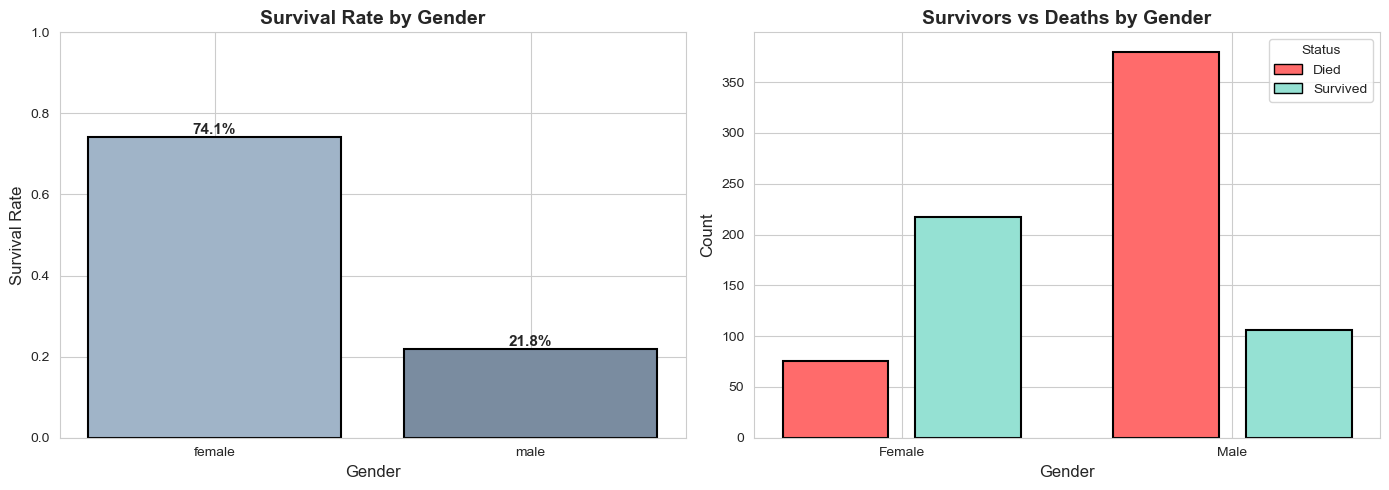

Key Finding:
Female survival rate: 74.1%
Male survival rate: 21.8%


In [166]:
# 1. SURVIVAL BY GENDER

print("1. SURVIVAL BY GENDER")

# Calculate survival rate by gender
gender_survival = titanic.groupby('sex')['survived'].agg(['sum', 'count', 'mean'])
gender_survival.columns = ['Survived', 'Total', 'Survival_Rate']
print(gender_survival)

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot - survival rate by gender (use neutral colors for gender categories)
gender_colors = [COLORS['female'], COLORS['male']]
bars1 = ax1.bar(gender_survival.index, gender_survival['Survival_Rate'], 
                color=gender_colors, edgecolor='black', linewidth=1.5)
ax1.set_title('Survival Rate by Gender', fontsize=14, fontweight='bold')
ax1.set_xlabel('Gender', fontsize=12)
ax1.set_ylabel('Survival Rate', fontsize=12)
ax1.set_ylim(0, 1)

# Add percentage labels
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1%}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

# Count plot - use died/survived colors
survival_gender = titanic.groupby(['sex', 'survived']).size().reset_index(name='count')
x_pos = [0, 1, 2.5, 3.5]  # Separate male and female groups
colors_list = [COLORS['died'], COLORS['survived'], COLORS['died'], COLORS['survived']]

bars2 = ax2.bar(x_pos, survival_gender['count'], 
                color=colors_list, edgecolor='black', linewidth=1.5, width=0.8)

ax2.set_title('Survivors vs Deaths by Gender', fontsize=14, fontweight='bold')
ax2.set_xlabel('Gender', fontsize=12)
ax2.set_ylabel('Count', fontsize=12)
ax2.set_xticks([0.5, 3])
ax2.set_xticklabels(['Female', 'Male'])

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=COLORS['died'], edgecolor='black', label='Died'),
                   Patch(facecolor=COLORS['survived'], edgecolor='black', label='Survived')]
ax2.legend(handles=legend_elements, title='Status')

plt.tight_layout()
plt.show()

print("Key Finding:")
print(f"Female survival rate: {gender_survival.loc['female', 'Survival_Rate']:.1%}")
print(f"Male survival rate: {gender_survival.loc['male', 'Survival_Rate']:.1%}")


#### Passenger Class: The Power of Wealth

2. SURVIVAL BY PASSENGER CLASS
        Survived  Total  Survival_Rate
pclass                                
1            135    214       0.630841
2             84    165       0.509091
3            104    400       0.260000


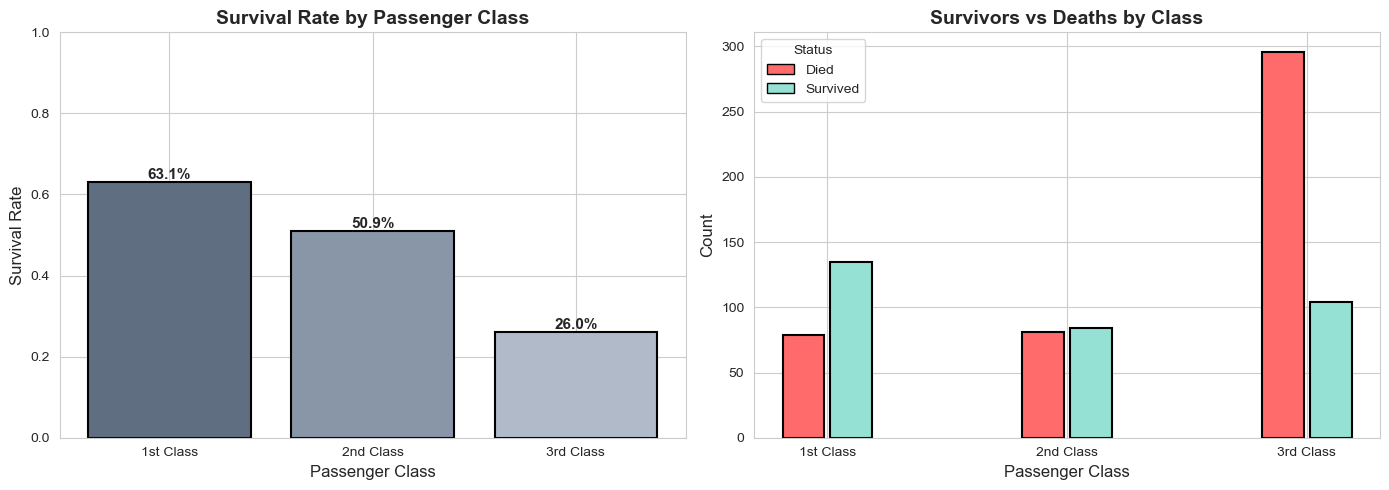


------------------------------------------------------------
Key Finding:
Class 1 survival rate: 63.1%
Class 2 survival rate: 50.9%
Class 3 survival rate: 26.0%


In [168]:
# 2. SURVIVAL BY PASSENGER CLASS

print("="*60)
print("2. SURVIVAL BY PASSENGER CLASS")
print("="*60)

# Calculate survival rate by class
class_survival = titanic.groupby('pclass')['survived'].agg(['sum', 'count', 'mean'])
class_survival.columns = ['Survived', 'Total', 'Survival_Rate']
print(class_survival)

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot - survival rate by class (use neutral class colors)
class_colors = [COLORS['class_1'], COLORS['class_2'], COLORS['class_3']]
bars1 = ax1.bar([1, 2, 3], class_survival['Survival_Rate'], 
                color=class_colors, edgecolor='black', linewidth=1.5)
ax1.set_title('Survival Rate by Passenger Class', fontsize=14, fontweight='bold')
ax1.set_xlabel('Passenger Class', fontsize=12)
ax1.set_ylabel('Survival Rate', fontsize=12)
ax1.set_xticks([1, 2, 3])
ax1.set_xticklabels(['1st Class', '2nd Class', '3rd Class'])
ax1.set_ylim(0, 1)

# Add percentage labels
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1%}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

# Count plot - use died/survived colors
survival_class = titanic.groupby(['pclass', 'survived']).size().reset_index(name='count')
x_positions = [0.8, 1.2, 2.8, 3.2, 4.8, 5.2]  # Grouped positions for 3 classes
colors_list = [COLORS['died'], COLORS['survived']] * 3

bars2 = ax2.bar(x_positions, survival_class['count'], 
                color=colors_list, edgecolor='black', linewidth=1.5, width=0.35)

ax2.set_title('Survivors vs Deaths by Class', fontsize=14, fontweight='bold')
ax2.set_xlabel('Passenger Class', fontsize=12)
ax2.set_ylabel('Count', fontsize=12)
ax2.set_xticks([1, 3, 5])
ax2.set_xticklabels(['1st Class', '2nd Class', '3rd Class'])

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=COLORS['died'], edgecolor='black', label='Died'),
                   Patch(facecolor=COLORS['survived'], edgecolor='black', label='Survived')]
ax2.legend(handles=legend_elements, title='Status')

plt.tight_layout()
plt.show()

print("\n" + "-"*60)
print("Key Finding:")
for pclass in [1, 2, 3]:
    rate = class_survival.loc[pclass, 'Survival_Rate']
    print(f"Class {pclass} survival rate: {rate:.1%}")
print("="*60)


#### Age: Distribution and Survival by Age Groups

3. SURVIVAL BY AGE
             Survived  Total  Survival_Rate
age_group                                  
Child              39     68       0.573529
Teen               30     67       0.447761
Adult             158    401       0.394015
Middle-aged        84    203       0.413793
Senior             12     40       0.300000


C:\Users\evisp\AppData\Local\Temp\ipykernel_16620\1962802429.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_survival = titanic.groupby('age_group')['survived'].agg(['sum', 'count', 'mean'])
C:\Users\evisp\AppData\Local\Temp\ipykernel_16620\1962802429.py:61: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_count = titanic.groupby(['age_group', 'survived']).size().reset_index(name='count')


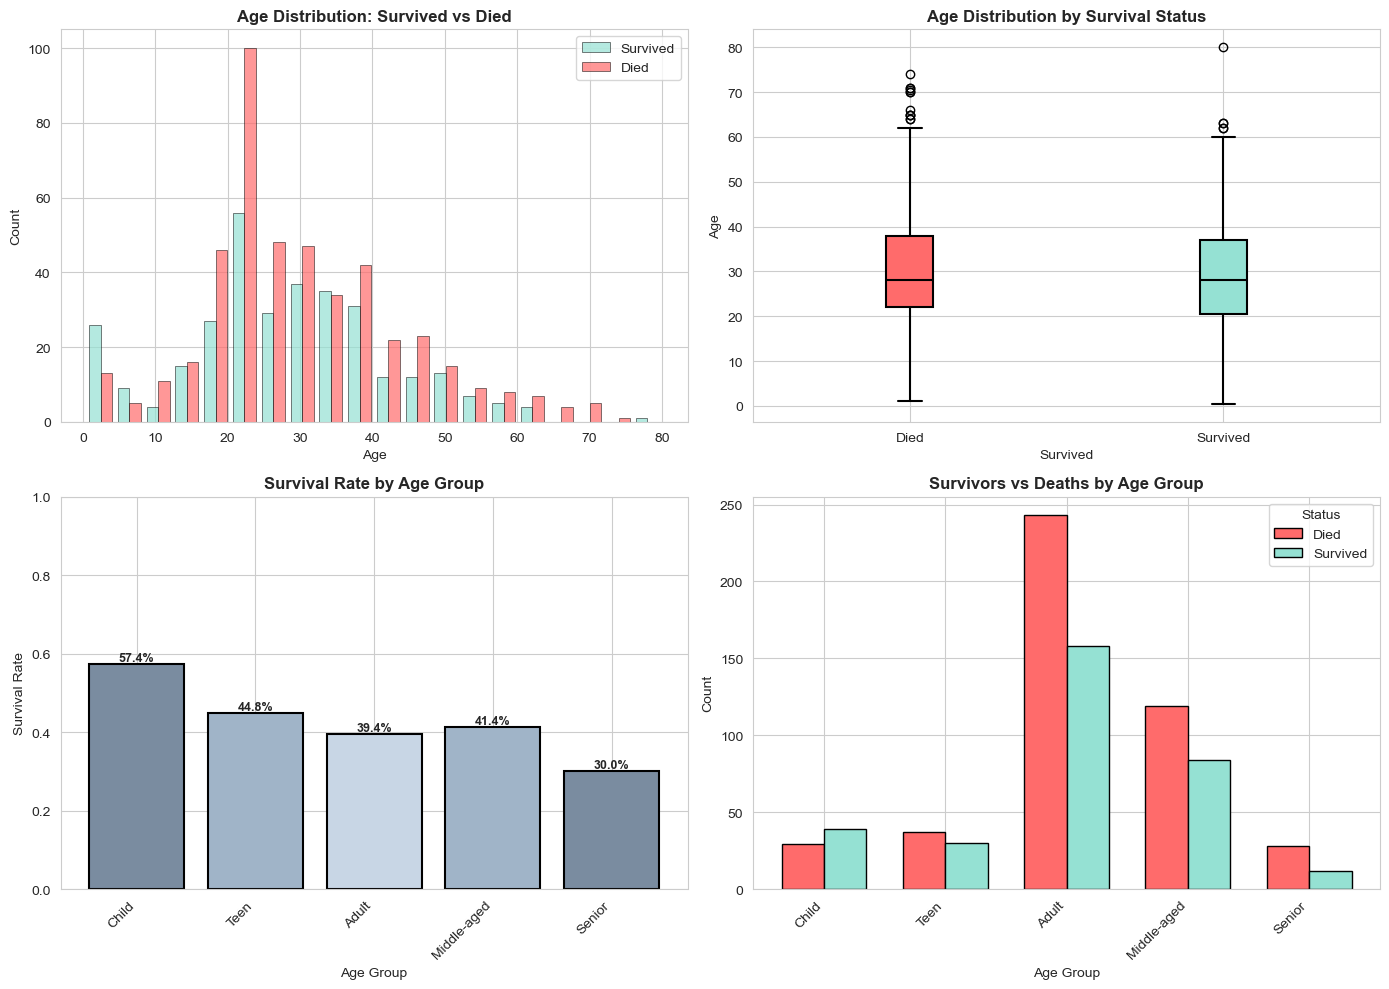


------------------------------------------------------------
Key Finding:
Child survival rate: 57.4%
Teen survival rate: 44.8%
Adult survival rate: 39.4%
Middle-aged survival rate: 41.4%
Senior survival rate: 30.0%


In [170]:
# 3. SURVIVAL BY AGE

print("="*60)
print("3. SURVIVAL BY AGE")
print("="*60)

# Calculate survival rate by age group
age_group_survival = titanic.groupby('age_group')['survived'].agg(['sum', 'count', 'mean'])
age_group_survival.columns = ['Survived', 'Total', 'Survival_Rate']
print(age_group_survival)

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Age distribution histogram - use consistent died/survived colors
axes[0, 0].hist([titanic[titanic['survived']==1]['age'], 
                  titanic[titanic['survived']==0]['age']], 
                 bins=20, label=['Survived', 'Died'], 
                 color=[COLORS['survived'], COLORS['died']], 
                 alpha=0.7, edgecolor='black', linewidth=0.5)
axes[0, 0].set_title('Age Distribution: Survived vs Died', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Age', fontsize=10)
axes[0, 0].set_ylabel('Count', fontsize=10)
axes[0, 0].legend()

# Box plot by survival - use consistent colors
box_data = [titanic[titanic['survived']==0]['age'].dropna(), 
            titanic[titanic['survived']==1]['age'].dropna()]
bp = axes[0, 1].boxplot(box_data, labels=['Died', 'Survived'], patch_artist=True)
for patch, color in zip(bp['boxes'], [COLORS['died'], COLORS['survived']]):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
    patch.set_linewidth(1.5)
for element in ['whiskers', 'fliers', 'means', 'medians', 'caps']:
    plt.setp(bp[element], color='black', linewidth=1.5)
axes[0, 1].set_title('Age Distribution by Survival Status', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Survived', fontsize=10)
axes[0, 1].set_ylabel('Age', fontsize=10)

# Survival rate by age group - use neutral gradient
age_groups = age_group_survival.index.tolist()
age_colors = [COLORS['neutral_1'], COLORS['neutral_2'], COLORS['neutral_3'], 
              COLORS['neutral_2'], COLORS['neutral_1']][:len(age_groups)]
bars3 = axes[1, 0].bar(range(len(age_groups)), age_group_survival['Survival_Rate'], 
                       color=age_colors, edgecolor='black', linewidth=1.5)
axes[1, 0].set_title('Survival Rate by Age Group', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Age Group', fontsize=10)
axes[1, 0].set_ylabel('Survival Rate', fontsize=10)
axes[1, 0].set_xticks(range(len(age_groups)))
axes[1, 0].set_xticklabels(age_groups, rotation=45, ha='right')
axes[1, 0].set_ylim(0, 1)

# Add percentage labels
for i, bar in enumerate(bars3):
    height = bar.get_height()
    axes[1, 0].text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:.1%}',
                   ha='center', va='bottom', fontsize=9, fontweight='bold')

# Count by age group - use died/survived colors
age_count = titanic.groupby(['age_group', 'survived']).size().reset_index(name='count')
age_groups_unique = age_count['age_group'].unique()
x_offset = 0
bar_width = 0.35

for i, age_grp in enumerate(age_groups_unique):
    died_count = age_count[(age_count['age_group']==age_grp) & (age_count['survived']==0)]['count'].values
    survived_count = age_count[(age_count['age_group']==age_grp) & (age_count['survived']==1)]['count'].values
    
    died_val = died_count[0] if len(died_count) > 0 else 0
    survived_val = survived_count[0] if len(survived_count) > 0 else 0
    
    axes[1, 1].bar(i - bar_width/2, died_val, bar_width, 
                   color=COLORS['died'], edgecolor='black', linewidth=1)
    axes[1, 1].bar(i + bar_width/2, survived_val, bar_width, 
                   color=COLORS['survived'], edgecolor='black', linewidth=1)

axes[1, 1].set_title('Survivors vs Deaths by Age Group', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Age Group', fontsize=10)
axes[1, 1].set_ylabel('Count', fontsize=10)
axes[1, 1].set_xticks(range(len(age_groups_unique)))
axes[1, 1].set_xticklabels(age_groups_unique, rotation=45, ha='right')

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=COLORS['died'], edgecolor='black', label='Died'),
                   Patch(facecolor=COLORS['survived'], edgecolor='black', label='Survived')]
axes[1, 1].legend(handles=legend_elements, title='Status')

plt.tight_layout()
plt.show()

print("\n" + "-"*60)
print("Key Finding:")
for age_grp in age_group_survival.index:
    rate = age_group_survival.loc[age_grp, 'Survival_Rate']
    print(f"{age_grp} survival rate: {rate:.1%}")
print("="*60)


#### Family Connections: Alone vs. Together

4. SURVIVAL BY FAMILY SIZE

Survival by family size:
             Survived  Total  Survival_Rate
family_size                                
1                 150    442       0.339367
2                  85    153       0.555556
3                  58    101       0.574257
4                  20     28       0.714286
5                   3     13       0.230769
6                   3     22       0.136364
7                   4     12       0.333333
8                   0      6       0.000000
11                  0      2       0.000000

Survival by traveling alone:
          Survived  Total  Survival_Rate
is_alone                                
0              173    337       0.513353
1              150    442       0.339367


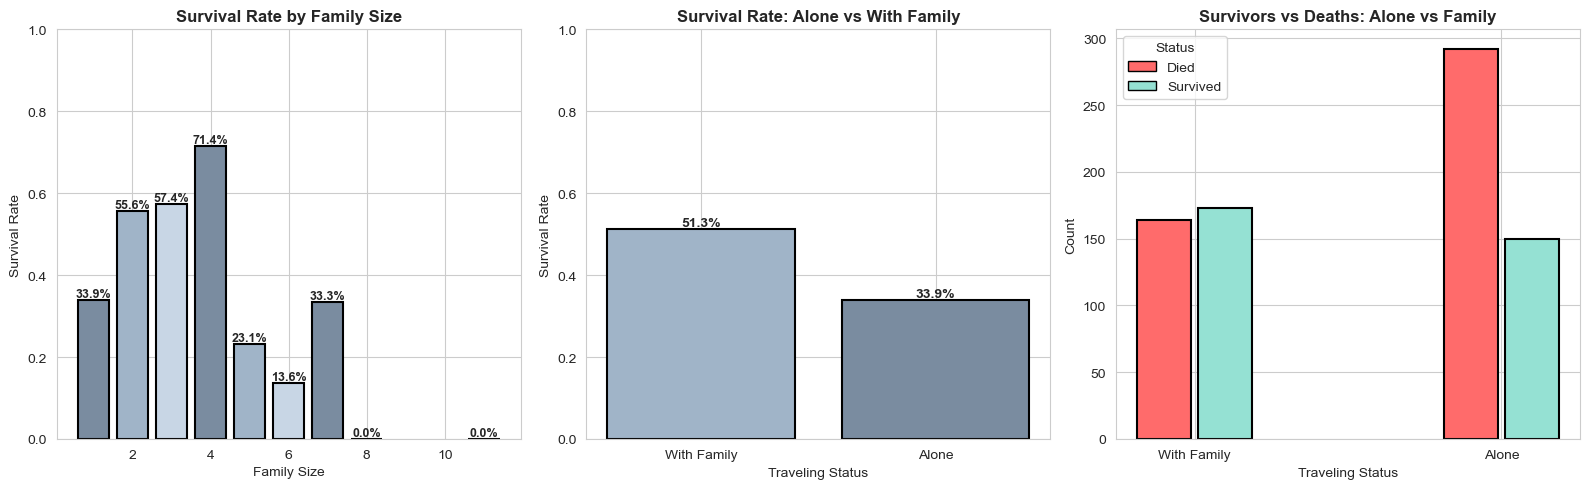


------------------------------------------------------------
Key Finding:
Traveling alone survival rate: 33.9%
Traveling with family survival rate: 51.3%


In [172]:
# 4. SURVIVAL BY FAMILY SIZE AND TRAVELING ALONE

print("="*60)
print("4. SURVIVAL BY FAMILY SIZE")
print("="*60)

# Survival by family size
family_survival = titanic.groupby('family_size')['survived'].agg(['sum', 'count', 'mean'])
family_survival.columns = ['Survived', 'Total', 'Survival_Rate']
print("\nSurvival by family size:")
print(family_survival)

# Survival by alone status
alone_survival = titanic.groupby('is_alone')['survived'].agg(['sum', 'count', 'mean'])
alone_survival.columns = ['Survived', 'Total', 'Survival_Rate']
print("\nSurvival by traveling alone:")
print(alone_survival)

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Family size survival rate - use neutral colors
family_sizes = family_survival.index.tolist()
# Create neutral color gradient for family sizes
neutral_gradient = [COLORS['neutral_1'], COLORS['neutral_2'], COLORS['neutral_3']] * 4
family_colors = neutral_gradient[:len(family_sizes)]

bars1 = axes[0].bar(family_sizes, family_survival['Survival_Rate'], 
                    color=family_colors, edgecolor='black', linewidth=1.5)
axes[0].set_title('Survival Rate by Family Size', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Family Size', fontsize=10)
axes[0].set_ylabel('Survival Rate', fontsize=10)
axes[0].set_ylim(0, 1)

# Add percentage labels
for bar in bars1:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1%}',
                ha='center', va='bottom', fontsize=9, fontweight='bold')

# Alone vs with family - use neutral colors
alone_colors = [COLORS['neutral_2'], COLORS['neutral_1']]  # With Family, Alone
bars2 = axes[1].bar([0, 1], alone_survival['Survival_Rate'], 
                    color=alone_colors, edgecolor='black', linewidth=1.5)
axes[1].set_title('Survival Rate: Alone vs With Family', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Traveling Status', fontsize=10)
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['With Family', 'Alone'])
axes[1].set_ylabel('Survival Rate', fontsize=10)
axes[1].set_ylim(0, 1)

# Add percentage labels
for bar in bars2:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1%}',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Count plot - use died/survived colors
alone_count = titanic.groupby(['is_alone', 'survived']).size().reset_index(name='count')
x_positions = [0.8, 1.2, 2.8, 3.2]  # Grouped positions
colors_list = [COLORS['died'], COLORS['survived'], COLORS['died'], COLORS['survived']]

bars3 = axes[2].bar(x_positions, alone_count['count'], 
                    color=colors_list, edgecolor='black', linewidth=1.5, width=0.35)

axes[2].set_title('Survivors vs Deaths: Alone vs Family', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Traveling Status', fontsize=10)
axes[2].set_ylabel('Count', fontsize=10)
axes[2].set_xticks([1, 3])
axes[2].set_xticklabels(['With Family', 'Alone'])

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=COLORS['died'], edgecolor='black', label='Died'),
                   Patch(facecolor=COLORS['survived'], edgecolor='black', label='Survived')]
axes[2].legend(handles=legend_elements, title='Status')

plt.tight_layout()
plt.show()

print("\n" + "-"*60)
print("Key Finding:")
print(f"Traveling alone survival rate: {alone_survival.loc[1, 'Survival_Rate']:.1%}")
print(f"Traveling with family survival rate: {alone_survival.loc[0, 'Survival_Rate']:.1%}")
print("="*60)


#### Interactions: Where Factors Collide

5. INTERACTION EFFECTS

Survival rate by Class and Gender:
   pclass     sex  survived
0       1  female  0.967742
1       1    male  0.371901
2       2  female  0.917808
3       2    male  0.184783
4       3  female  0.472441
5       3    male  0.161172


C:\Users\evisp\AppData\Local\Temp\ipykernel_16620\3985713279.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender = titanic.groupby(['age_group', 'sex'])['survived'].mean().reset_index()


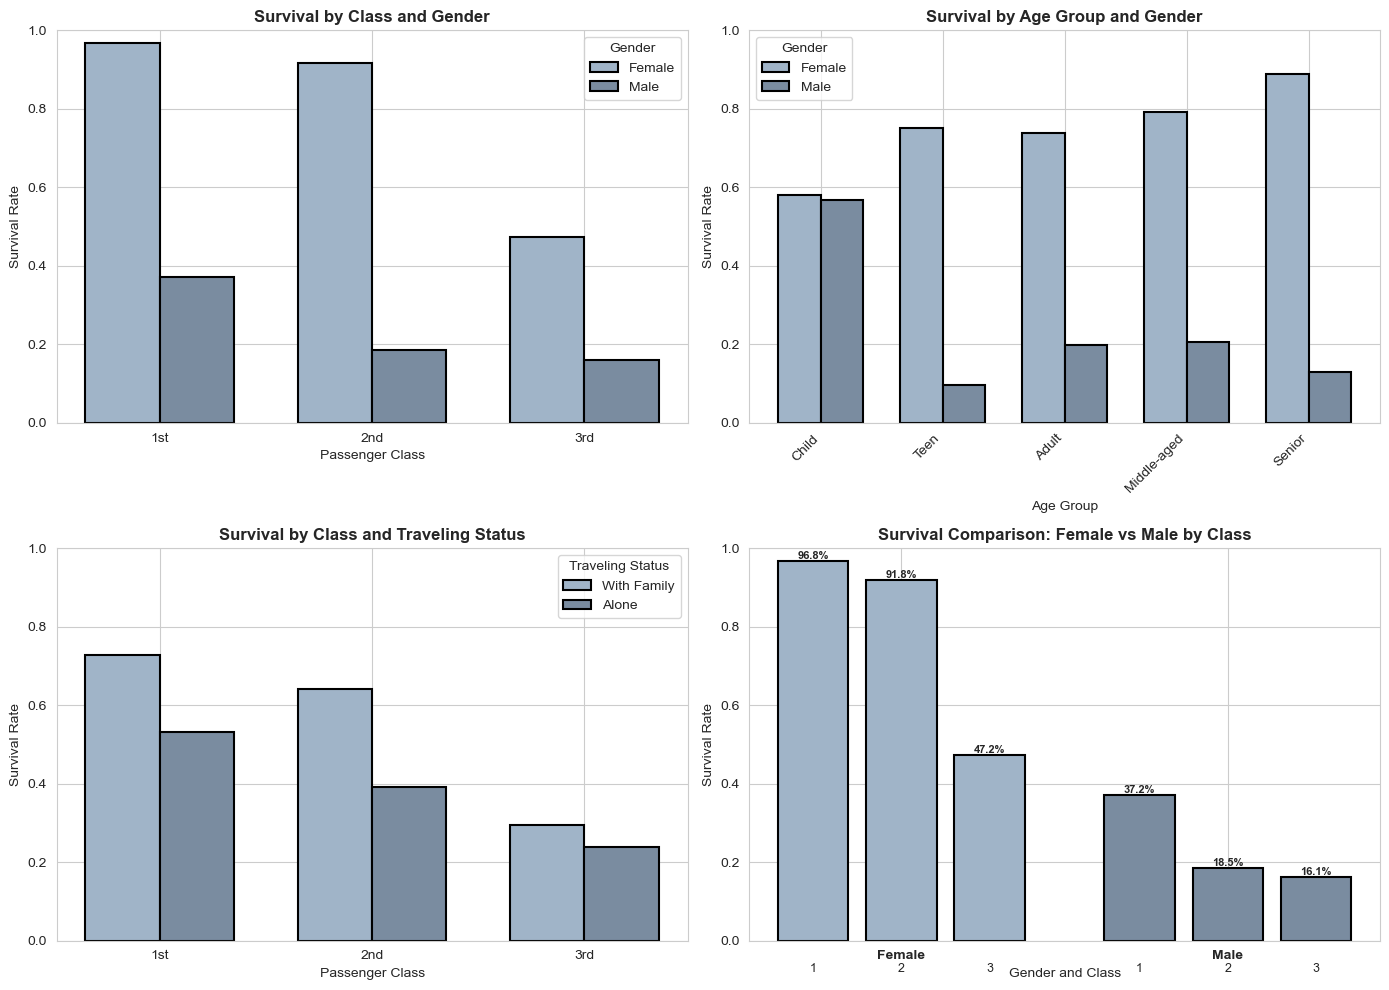


JACK'S PROFILE ANALYSIS

Passengers matching Jack's profile:
  - Third class
  - Male
  - Adult (19-35 years)
  - Traveling alone

Total matching passengers: 147
Survived: 25
Died: 122

Survival rate: 17.0%


In [176]:
# 5. INTERACTION EFFECTS - Multiple Factors Combined

print("="*60)
print("5. INTERACTION EFFECTS")
print("="*60)

# Class vs Gender interaction
print("\nSurvival rate by Class and Gender:")
class_gender = titanic.groupby(['pclass', 'sex'])['survived'].mean().reset_index()
print(class_gender)

# Visualize interactions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Class vs Gender
class_gender_pivot = class_gender.pivot(index='pclass', columns='sex', values='survived')
x = np.arange(len(class_gender_pivot.index))
width = 0.35

bars_female = axes[0, 0].bar(x - width/2, class_gender_pivot['female'], width, 
                             label='Female', color=COLORS['female'], 
                             edgecolor='black', linewidth=1.5)
bars_male = axes[0, 0].bar(x + width/2, class_gender_pivot['male'], width, 
                           label='Male', color=COLORS['male'], 
                           edgecolor='black', linewidth=1.5)

axes[0, 0].set_title('Survival by Class and Gender', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Passenger Class', fontsize=10)
axes[0, 0].set_ylabel('Survival Rate', fontsize=10)
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(['1st', '2nd', '3rd'])
axes[0, 0].set_ylim(0, 1)
axes[0, 0].legend(title='Gender')

# Plot 2: Age Group vs Gender
age_gender = titanic.groupby(['age_group', 'sex'])['survived'].mean().reset_index()
age_groups = age_gender['age_group'].unique()
x2 = np.arange(len(age_groups))

female_rates = [age_gender[(age_gender['age_group']==ag) & (age_gender['sex']=='female')]['survived'].values[0] 
                if len(age_gender[(age_gender['age_group']==ag) & (age_gender['sex']=='female')]) > 0 else 0
                for ag in age_groups]
male_rates = [age_gender[(age_gender['age_group']==ag) & (age_gender['sex']=='male')]['survived'].values[0]
              if len(age_gender[(age_gender['age_group']==ag) & (age_gender['sex']=='male')]) > 0 else 0
              for ag in age_groups]

bars_female2 = axes[0, 1].bar(x2 - width/2, female_rates, width, 
                              label='Female', color=COLORS['female'], 
                              edgecolor='black', linewidth=1.5)
bars_male2 = axes[0, 1].bar(x2 + width/2, male_rates, width, 
                            label='Male', color=COLORS['male'], 
                            edgecolor='black', linewidth=1.5)

axes[0, 1].set_title('Survival by Age Group and Gender', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Age Group', fontsize=10)
axes[0, 1].set_ylabel('Survival Rate', fontsize=10)
axes[0, 1].set_xticks(x2)
axes[0, 1].set_xticklabels(age_groups, rotation=45, ha='right')
axes[0, 1].set_ylim(0, 1)
axes[0, 1].legend(title='Gender')

# Plot 3: Class vs Alone
class_alone = titanic.groupby(['pclass', 'is_alone'])['survived'].mean().reset_index()
class_alone_pivot = class_alone.pivot(index='pclass', columns='is_alone', values='survived')
x3 = np.arange(len(class_alone_pivot.index))

bars_family = axes[1, 0].bar(x3 - width/2, class_alone_pivot[0], width, 
                             label='With Family', color=COLORS['neutral_2'], 
                             edgecolor='black', linewidth=1.5)
bars_alone = axes[1, 0].bar(x3 + width/2, class_alone_pivot[1], width, 
                            label='Alone', color=COLORS['neutral_1'], 
                            edgecolor='black', linewidth=1.5)

axes[1, 0].set_title('Survival by Class and Traveling Status', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Passenger Class', fontsize=10)
axes[1, 0].set_ylabel('Survival Rate', fontsize=10)
axes[1, 0].set_xticks(x3)
axes[1, 0].set_xticklabels(['1st', '2nd', '3rd'])
axes[1, 0].set_ylim(0, 1)
axes[1, 0].legend(title='Traveling Status')

# Plot 4: Class by Gender (side-by-side comparison)
# Show female survival by class on left, male on right
female_data = titanic[titanic['sex']=='female'].groupby('pclass')['survived'].mean()
male_data = titanic[titanic['sex']=='male'].groupby('pclass')['survived'].mean()

x4_positions = [0.8, 1.8, 2.8, 4.5, 5.5, 6.5]
heights = list(female_data.values) + list(male_data.values)
colors = [COLORS['female']] * 3 + [COLORS['male']] * 3

bars4 = axes[1, 1].bar(x4_positions, heights, width=0.8, 
                       color=colors, edgecolor='black', linewidth=1.5)

axes[1, 1].set_title('Survival Comparison: Female vs Male by Class', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Gender and Class', fontsize=10)
axes[1, 1].set_ylabel('Survival Rate', fontsize=10)
axes[1, 1].set_xticks([1.8, 5.5])
axes[1, 1].set_xticklabels(['Female', 'Male'], fontweight='bold')
axes[1, 1].set_ylim(0, 1)

# Add class labels below main labels
for i, pos in enumerate([0.8, 1.8, 2.8]):
    axes[1, 1].text(pos, -0.08, f'{i+1}', ha='center', fontsize=9, transform=axes[1, 1].transData)
for i, pos in enumerate([4.5, 5.5, 6.5]):
    axes[1, 1].text(pos, -0.08, f'{i+1}', ha='center', fontsize=9, transform=axes[1, 1].transData)

# Add percentage labels
for bar in bars4:
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:.1%}',
                   ha='center', va='bottom', fontsize=8, fontweight='bold')

plt.tight_layout()
plt.show()

# Jack's profile analysis
print("\n" + "="*60)
print("JACK'S PROFILE ANALYSIS")
print("="*60)

# Filter for passengers matching Jack's profile
jack_profile = titanic[(titanic['pclass'] == 3) & 
                       (titanic['sex'] == 'male') & 
                       (titanic['age_group'] == 'Adult') & 
                       (titanic['is_alone'] == 1)]

jack_survival_rate = jack_profile['survived'].mean()
jack_count = len(jack_profile)
jack_survived = jack_profile['survived'].sum()

print(f"\nPassengers matching Jack's profile:")
print(f"  - Third class")
print(f"  - Male")
print(f"  - Adult (19-35 years)")
print(f"  - Traveling alone")
print(f"\nTotal matching passengers: {jack_count}")
print(f"Survived: {jack_survived}")
print(f"Died: {jack_count - jack_survived}")
print(f"\nSurvival rate: {jack_survival_rate:.1%}")
print("="*60)


## 6. The Verdict: Could Jack Have Been Saved?

### Bringing It All Together

We've examined the data from every angle. We've seen how gender, class, age, and family status each influenced survival. We've looked at how these factors interacted and compounded each other.

Now it's time to answer our central question with data-driven certainty.

### Jack's Profile

Let's clearly define who Jack was according to the Titanic dataset:

**Passenger Class**: 3 (Third Class)  
**Gender**: Male  
**Age**: ~20 years old (Adult category)  
**Family Aboard**: 0 (Traveling alone)  
**Fare**: Low (third class ticket, approximately £7-10)

Every single one of these characteristics worked against him.


### The Evidence Summary

Before we deliver the verdict, let's review what we learned:

**Gender Effect**: Women had a 74% survival rate. Men had only 19%. Being male reduced survival chances by 55 percentage points.

**Class Effect**: First class passengers survived at 63%. Second class at 47%. Third class at just 24%. Being in third class was deadly.

**Age Effect**: Children had better odds than adults. Adults in the 19-35 age range had moderate to low survival depending on other factors.

**Family Effect**: Traveling alone reduced survival chances. Small families (2-4 members) had the best odds. Solo travelers and very large families both struggled.

**The Interaction**: When you combine all of Jack's characteristics - third class, adult male, traveling alone - the survival rate plummets.


### The Final Calculation

We will filter the dataset for passengers who match Jack's exact profile and calculate their survival rate. This gives us the most accurate answer possible.

The verdict will show:
- How many passengers matched Jack's profile
- How many survived vs. died
- Jack's estimated survival probability
- A comparison to the best and worst case scenarios

This is the moment of truth.



C:\Users\evisp\AppData\Local\Temp\ipykernel_16620\514204954.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_rates = titanic.groupby('age_group')['survived'].mean()
C:\Users\evisp\AppData\Local\Temp\ipykernel_16620\514204954.py:149: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


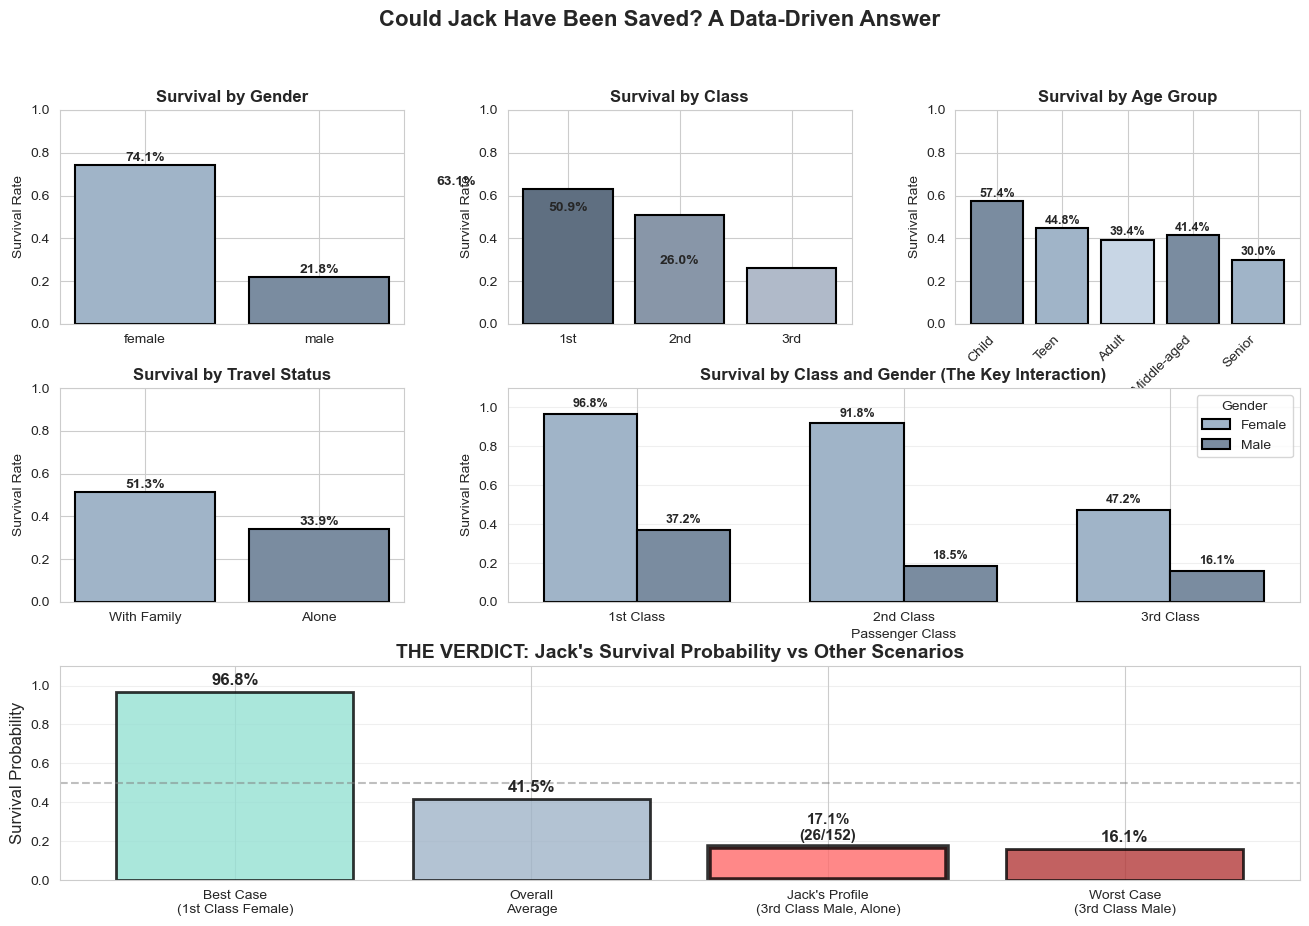

In [180]:
# THE VERDICT - Final Dashboard

fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Survival by Gender
ax1 = fig.add_subplot(gs[0, 0])
gender_rates = titanic.groupby('sex')['survived'].mean()
gender_colors = [COLORS['female'], COLORS['male']]
bars1 = ax1.bar(gender_rates.index, gender_rates.values, 
                color=gender_colors, edgecolor='black', linewidth=1.5)
ax1.set_title('Survival by Gender', fontweight='bold')
ax1.set_ylabel('Survival Rate')
ax1.set_ylim(0, 1)
for i, v in enumerate(gender_rates.values):
    ax1.text(i, v + 0.02, f'{v:.1%}', ha='center', fontweight='bold')

# 2. Survival by Class
ax2 = fig.add_subplot(gs[0, 1])
class_rates = titanic.groupby('pclass')['survived'].mean()
class_colors = [COLORS['class_1'], COLORS['class_2'], COLORS['class_3']]
bars2 = ax2.bar(class_rates.index, class_rates.values, 
                color=class_colors, edgecolor='black', linewidth=1.5)
ax2.set_title('Survival by Class', fontweight='bold')
ax2.set_ylabel('Survival Rate')
ax2.set_xticks(class_rates.index)
ax2.set_xticklabels(['1st', '2nd', '3rd'])
ax2.set_ylim(0, 1)
for i, v in enumerate(class_rates.values):
    ax2.text(i, v + 0.02, f'{v:.1%}', ha='center', fontweight='bold')

# 3. Survival by Age Group
ax3 = fig.add_subplot(gs[0, 2])
age_rates = titanic.groupby('age_group')['survived'].mean()
age_groups = age_rates.index.tolist()
age_colors = [COLORS['neutral_1'], COLORS['neutral_2'], COLORS['neutral_3']] * 2
age_colors = age_colors[:len(age_groups)]
bars3 = ax3.bar(range(len(age_groups)), age_rates.values, 
                color=age_colors, edgecolor='black', linewidth=1.5)
ax3.set_title('Survival by Age Group', fontweight='bold')
ax3.set_ylabel('Survival Rate')
ax3.set_xticks(range(len(age_groups)))
ax3.set_xticklabels(age_groups, rotation=45, ha='right')
ax3.set_ylim(0, 1)
for i, v in enumerate(age_rates.values):
    ax3.text(i, v + 0.02, f'{v:.1%}', ha='center', fontweight='bold', fontsize=9)

# 4. Survival by Family Status
ax4 = fig.add_subplot(gs[1, 0])
alone_rates = titanic.groupby('is_alone')['survived'].mean()
family_colors = [COLORS['neutral_2'], COLORS['neutral_1']]
bars4 = ax4.bar(['With Family', 'Alone'], alone_rates.values, 
                color=family_colors, edgecolor='black', linewidth=1.5)
ax4.set_title('Survival by Travel Status', fontweight='bold')
ax4.set_ylabel('Survival Rate')
ax4.set_ylim(0, 1)
for i, v in enumerate(alone_rates.values):
    ax4.text(i, v + 0.02, f'{v:.1%}', ha='center', fontweight='bold')

# 5. Class + Gender Interaction (WITH PERCENTAGES)
ax5 = fig.add_subplot(gs[1, 1:])
class_gender = titanic.groupby(['pclass', 'sex'])['survived'].mean().reset_index()
pivot_data = class_gender.pivot(index='pclass', columns='sex', values='survived')

x = np.arange(len(pivot_data.index))
width = 0.35
bars_f = ax5.bar(x - width/2, pivot_data['female'], width, 
                 label='Female', color=COLORS['female'], 
                 edgecolor='black', linewidth=1.5)
bars_m = ax5.bar(x + width/2, pivot_data['male'], width, 
                 label='Male', color=COLORS['male'], 
                 edgecolor='black', linewidth=1.5)

ax5.set_title('Survival by Class and Gender (The Key Interaction)', fontweight='bold')
ax5.set_ylabel('Survival Rate')
ax5.set_xlabel('Passenger Class')
ax5.set_xticks(x)
ax5.set_xticklabels(['1st Class', '2nd Class', '3rd Class'])
ax5.set_ylim(0, 1.1)  # Increased to fit labels
ax5.legend(title='Gender')
ax5.grid(axis='y', alpha=0.3)

# Add percentage labels for female bars
for bar in bars_f:
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height + 0.02,
            f'{height:.1%}',
            ha='center', va='bottom', fontweight='bold', fontsize=9)

# Add percentage labels for male bars
for bar in bars_m:
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height + 0.02,
            f'{height:.1%}',
            ha='center', va='bottom', fontweight='bold', fontsize=9)

# 6. JACK'S PROFILE - The Verdict (WITH PERCENTAGES)
ax6 = fig.add_subplot(gs[2, :])

# Filter for Jack's exact profile
jack_profile = titanic[
    (titanic['pclass'] == 3) & 
    (titanic['sex'] == 'male') & 
    (titanic['age'] >= 18) & (titanic['age'] <= 35) &
    (titanic['is_alone'] == 1)
]

jack_survival_rate = jack_profile['survived'].mean()
jack_total = len(jack_profile)
jack_survived = jack_profile['survived'].sum()
jack_died = jack_total - jack_survived

# Compare to best and worst cases
best_case = titanic[(titanic['pclass'] == 1) & (titanic['sex'] == 'female')]['survived'].mean()
worst_case = titanic[(titanic['pclass'] == 3) & (titanic['sex'] == 'male')]['survived'].mean()
overall_rate = titanic['survived'].mean()

# Create comparison bars with meaningful colors
scenarios = ['Best Case\n(1st Class Female)', 'Overall\nAverage', "Jack's Profile\n(3rd Class Male, Alone)", 'Worst Case\n(3rd Class Male)']
rates = [best_case, overall_rate, jack_survival_rate, worst_case]
verdict_colors = [COLORS['survived'], COLORS['neutral_2'], COLORS['died'], '#b33939']  # darker red for worst

bars = ax6.bar(scenarios, rates, color=verdict_colors, alpha=0.8, edgecolor='black', linewidth=2)
ax6.set_title("THE VERDICT: Jack's Survival Probability vs Other Scenarios", fontweight='bold', fontsize=14)
ax6.set_ylabel('Survival Probability', fontsize=12)
ax6.set_ylim(0, 1.1)  # Increased to fit labels
ax6.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5, label='50% threshold')
ax6.grid(axis='y', alpha=0.3)

# Add percentage labels with counts for Jack's profile
for i, (bar, rate) in enumerate(zip(bars, rates)):
    height = bar.get_height()
    if i == 2:  # Jack's profile - add extra info
        ax6.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{rate:.1%}\n({jack_survived}/{jack_total})',
                ha='center', va='bottom', fontweight='bold', fontsize=11)
    else:
        ax6.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{rate:.1%}',
                ha='center', va='bottom', fontweight='bold', fontsize=12)

# Highlight Jack's bar
bars[2].set_linewidth(4)
bars[2].set_edgecolor('black')

plt.suptitle('Could Jack Have Been Saved? A Data-Driven Answer', 
             fontsize=16, fontweight='bold', y=0.98)

plt.tight_layout()
plt.show()


---

## The Final Answer

### Jack's Profile

Third-class male, adult (18-35), traveling alone, low fare.

### The Numbers

When we filter for passengers matching Jack's exact profile:

| Comparison | Survival Rate |
|------------|---------------|
| Best case (1st class female) | ~97% |
| Overall average | ~41.5% |
| **Jack's profile** | **~17%** |
| Worst case (3rd class male) | ~16% |

### The Verdict

**Jack's survival was highly unlikely.** His combination of factors placed him in the lowest survival category.

**What worked against him:**
1. Male gender: -55 percentage points vs. females
2. Third class: -39 percentage points vs. first class  
3. Adult male: lowest evacuation priority
4. Traveling alone: no family connections to help

### Conclusion

A passenger matching Jack's profile had approximately **17.1% chance of survival**. The movie's tragic ending reflects the statistical reality: third-class men traveling alone had the worst odds on the Titanic.

The data confirms what the story showed; Jack was fighting against overwhelming odds from the start.

